# Biophysics Lab - 4/26/2019

## Author: Stephanie M. Yan

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Plot the data in a variety of ways: swarm plot, violin plot, box plot.

/Users/cmdb/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


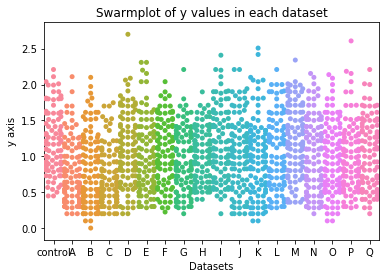

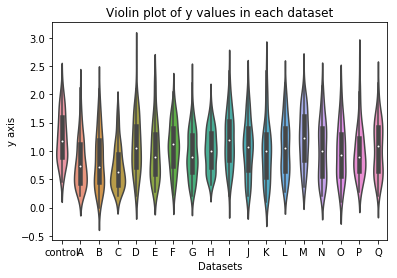

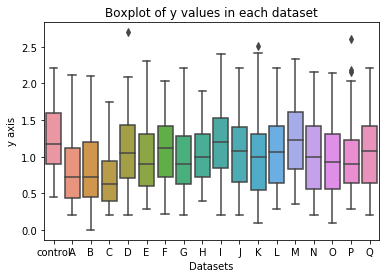

In [24]:
df = pd.read_csv("/Users/cmdb/Documents/Classes/Biophysics/Pairing_data_increased_n_040619.csv")

# swarm plot
fig, ax0 = plt.subplots()
ax0 = sns.swarmplot(data = df)
ax0.set_ylabel("y axis")
ax0.set_xlabel("Datasets")
ax0.set_title("Swarmplot of y values in each dataset")

# violin plot
fig, ax1 = plt.subplots()
ax1 = sns.violinplot(data = df)
ax1.set_ylabel("y axis")
ax1.set_xlabel("Datasets")
ax1.set_title("Violin plot of y values in each dataset")

# boxplot
fig, ax2 = plt.subplots()
ax2 = sns.boxplot(data = df)
ax2.set_ylabel("y axis")
ax2.set_xlabel("Datasets")
ax2.set_title("Boxplot of y values in each dataset");

## 2. For each piece of data, state whether a single or double Gaussian fits the data better.

In [25]:
print("Control - double Gaussian")
print("A - double Gaussian")
print("B - double Gaussian")
print("C - double Gaussian")
print("D - single Gaussian")
print("E - double Gaussian")
print("F - single Gaussian")
print("G - double Gaussian")
print("H - single Gaussian")
print("I - single Gaussian")
print("J - single Gaussian")
print("K - single Gaussian")
print("L - double Gaussian")
print("M - single Gaussian")
print("N - double Gaussian")
print("O - single Gaussian")
print("P - single Gaussian")
print("Q - double Gaussian")

Control - double Gaussian
A - double Gaussian
B - double Gaussian
C - double Gaussian
D - single Gaussian
E - double Gaussian
F - single Gaussian
G - double Gaussian
H - single Gaussian
I - single Gaussian
J - single Gaussian
K - single Gaussian
L - double Gaussian
M - single Gaussian
N - double Gaussian
O - single Gaussian
P - single Gaussian
Q - double Gaussian


## 3. Perform a Mann Whitney U test between each dataset vs. control pair.

In [26]:
import scipy
import itertools

# get column names from dataframe
col_names = df.columns.values.tolist()

# code for getting every possible combination of datasets:
# combos = itertools.combinations(col_names, 2)
# for i in list(combos):
#     print(i)

# create new dataframe to store pvalues in
filler = np.random.randn(18)
df2 = pd.DataFrame({"pval":filler, "stat":filler})

# create list to keep track of which datasets are being compared
pairs = ["control"]

# iterate through columns of dataframe, performing Mann Whitney U test on each column vs. control column
for i, name in enumerate(col_names):
    if name == "control":
        continue
    else:
        control = df['control'].tolist()
        condition = df[name].tolist()
        stat, pval = scipy.stats.mannwhitneyu(control, condition)
        
        # add stat and pvalue results to new dataframe
        df2.loc[i,"stat"] = stat
        df2.loc[i,"pval"] = pval
        pairs.append("control vs. " + name)
        
# reindex new dataframe by IDs for pairwise comparisons
df2.index = pairs
df2

,pval,stat
control,1.916727e+00,1.916727
control vs. A,2.643157e-11,2314.500000
control vs. B,3.330194e-08,2790.000000
control vs. C,1.509433e-14,1891.000000
control vs. D,2.691528e-02,4210.500000
control vs. E,1.169463e-04,3494.000000
control vs. F,3.276761e-02,4246.000000
control vs. G,1.663351e-05,3301.500000
control vs. H,1.851193e-03,3812.000000
control vs. I,3.930796e-01,4888.500000


## For the p-values given, calculate whether they are significant or not, given an error rate of 0.05, with Bonferroni or FDR correction.

In [27]:
# FDR correction
from statsmodels.stats.multitest import fdrcorrection

# get pvalues from dataframe
pvals = df2["pval"].tolist()
# perform FDR correction o nthem
reject, pcorr = fdrcorrection(pvals, alpha=0.05)

# add new column to dataframe with corrected pvalues
df2["pcorr"] = pcorr

# create a new dataframe with only comparisons that have pvalues below 0.05
roi = df2.loc[:,"pcorr"] < 0.05
pcorr_df = df2.loc[roi,:]

print("Significant comparisons after FDR correction:")
pcorr_df

Significant comparisons after FDR correction:


,pval,stat,pcorr
control vs. A,2.643157e-11,2314.5,2.378842e-10
control vs. B,3.330194e-08,2790.0,1.998116e-07
control vs. C,1.509433e-14,1891.0,2.716980e-13
control vs. D,2.691528e-02,4210.5,3.460536e-02
control vs. E,1.169463e-04,3494.0,3.309352e-04
control vs. F,3.276761e-02,4246.0,3.932113e-02
control vs. G,1.663351e-05,3301.5,7.485082e-05
control vs. H,1.851193e-03,3812.0,3.399486e-03
control vs. J,1.518187e-02,4113.5,2.102105e-02
control vs. K,2.622397e-04,3580.5,5.900393e-04


## 4. Determine whether each column of data fits a double or single Gaussian better.

### a. Calculate the mean, standard deviation, and log likelihood for each column. 

In [34]:
import math

# make list to store log likelihoods for single Gaussian fit
single_logLs = []

# iterate through columns of dataframe and calculate mean, std dev, and log likelihood for each
for name in col_names:
    condition = df[name].tolist()
    mean = np.mean(condition)
    stddev = np.std(condition)
    
    logpdfs = []
    for value in condition:
        denom = math.sqrt(2*math.pi*(stddev**2))
        num = np.exp(-0.5*((value - mean)/stddev)**2)
        pdf = num/denom # calculate pdf for each value in the column
        logpdf = math.log(pdf)
        logpdfs.append(logpdf)
        
    logL = sum(logpdfs) # calculate log likelihood for the column
    single_logLs.append(-logL)

print("Log likelihoods for single Gaussian fit of each column:")
single_logLs

Log likelihoods for single Gaussian fit of each column:


[58.2103417469076,
 55.56109142613829,
 71.39712661978704,
 45.17889683113455,
 71.88530103788324,
 72.97747603979663,
 55.53560782424377,
 54.64014871204413,
 40.30776346342272,
 67.1062237156688,
 71.69034901824476,
 78.91415312440688,
 70.36504151892439,
 68.3825834049408,
 74.36505555913119,
 68.82020926928524,
 62.788125318452515,
 65.39703003295415]

### b. Calculate the best parameters for a double Gaussian using a maximimum likelihood estimate.

In [38]:
from scipy.optimize import minimize

# define function to minimize (i.e. we're maximizing the log likelihood for each column)
def pdf_func(params, X): # params: list of parameters to optimize
                        # X: dataset (list of pdf values for each column)
    sig1 = params[0]
    mu1 = params[1]
    sig2 = params[2]
    mu2 = params[3]
    w = params[4]
    
    # keep track of total log likelihood for column
    total = 0
    
    # iterate through column of dataframe calculating pdfs
    for val in X:
        denom1 = math.sqrt(2*math.pi*(sig1**2))
        num1 = np.exp(-0.5*((val - mu1)/sig1)**2)
        gauss1 = num1/denom1

        denom2 = math.sqrt(2*math.pi*(sig2**2))
        num2 = np.exp(-0.5*((val - mu1)/sig2)**2)
        gauss2 = num2/denom2
        
        pdf = (w*gauss1 + (1-w)*gauss2)
        
        total += np.log(pdf)
    
    return((-1)*(total))

# intial guess for parameters
p0 = [0.5, 0.4, 0.9, 0.4, 0.3]

# set bounds for parameters
bounds_guess = (0.0001,3), (0.0001,3), (0.0001,3), (0.0001,3), (0.0001,1)

#  make list to store log likelihood values for double Gaussian fit
double_logLs = []

# do minimize function on double Gaussian fit for all columns of dataframe
for name in col_names:
    popt = minimize(pdf_func, p0, args=df[name].tolist(), bounds=bounds_guess) # args = data in the column
    double_logLs.append(popt.fun) # pop.fun is what pdf_func returns, i.e. the log likelihood

"Log likelihoods for double Gaussian fit of each column:"
double_logLs

/Users/cmdb/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
/Users/cmdb/miniconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


[59.9582099846946,
 92.96214992543281,
 102.52830966130465,
 85.51107701724517,
 78.04064845902944,
 72.97747604166908,
 55.53956246389979,
 54.640148712050525,
 40.31237614663265,
 68.05692958055916,
 71.69034902982177,
 78.91441076114464,
 75.45619079796283,
 69.39673608300436,
 74.36690205634201,
 68.82020927006988,
 60.80919459074882,
 65.39703003301695]

### Once you have your log likelihood functions, use them to calculate the BIC and determine which fit was better.

In [39]:
# calculate BIC for each column, using the log likelihoods of the single and double Gaussian fits
for log_s, log_d, name in zip(single_logLs, double_logLs, col_names):
    BIC_s = np.log(100)*2 - 2*log_s
    BIC_d = np.log(100)*5 - 2*log_d
    
    # print(BIC_s, BIC_d)
    
    if BIC_s < BIC_d: # the better fit has the lower BIC
        print(name + ": " + "single Gaussian")
    else:
        print(name + ": " + "double Gaussian")

control: single Gaussian
A: double Gaussian
B: double Gaussian
C: double Gaussian
D: single Gaussian
E: single Gaussian
F: single Gaussian
G: single Gaussian
H: single Gaussian
I: single Gaussian
J: single Gaussian
K: single Gaussian
L: single Gaussian
M: single Gaussian
N: single Gaussian
O: single Gaussian
P: single Gaussian
Q: single Gaussian
